## Compile Figure 2 - Training curves for three VAE architectures

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))

In [2]:
file_extensions <- c(".png", ".pdf")

plot_theme <- theme(
    axis.title.y = element_text(size = 6),
    axis.title.x = element_text(size = 9),
    legend.text = element_text(size = 7),
    legend.title = element_text(size = 9),
    legend.key.size = unit(0.5, 'cm')
)

In [5]:
# Load training curve data
data_file <- file.path("training_curve_summary_data_L1000.csv")

training_col_types <- readr::cols(
    epoch = readr::col_double(),
    model = readr::col_character(),
    shuffled = readr::col_character(),
    loss_type = readr::col_character(),
    loss_value = readr::col_double()
)

training_df <- readr::read_csv(data_file, col_types = training_col_types)

In [6]:
# Process training data for plot input
training_df$loss_type <- dplyr::recode(
    training_df$loss_type, loss = "Training", val_loss = "Validation"
)

training_df$shuffled <- dplyr::recode(
    training_df$shuffled, real = "Real", shuffled = "Shuffled"
)

# Rename columns
training_df <- training_df %>% dplyr::rename(`Input` = shuffled, `Data split` = loss_type)

print(dim(training_df))
head(training_df)

[1] 1560    5


epoch,model,Input,Data split,loss_value
<dbl>,<chr>,<chr>,<chr>,<dbl>
0,beta,Real,Training,2038.138
1,beta,Real,Training,1722.723
2,beta,Real,Training,1657.681
3,beta,Real,Training,1624.629
4,beta,Real,Training,1597.073
5,beta,Real,Training,1573.489


In [7]:
table(training_df$model)


   beta     mmd vanilla 
    720     120     720 

In [8]:
split_colors <- c("Training" = "#708A8C", "Validation" = "#FD3A4A")

In [9]:
# Figure panel A
plot_subset_df <- training_df %>%
    dplyr::filter(model == "vanilla")

panel_a_gg <- (
    ggplot(plot_subset_df, aes(x = epoch, y = loss_value))
    + geom_line(aes(color = `Data split`, linetype = `Input`))
    + scale_color_manual(values = split_colors)
    + theme_bw()
    + xlab("Epoch")
    + ylab("Vanilla VAE loss\n(MSE + KL divergence)")
    + plot_theme
)

In [10]:
# Figure panel B
plot_subset_df <- training_df %>%
    dplyr::filter(model == "beta")

panel_b_gg <- (
    ggplot(plot_subset_df, aes(x = epoch, y = loss_value))
    + geom_line(aes(color = `Data split`, linetype = `Input`))
    + scale_color_manual(values = split_colors)
    + theme_bw()
    + xlab("Epoch")
    + ylab("Beta VAE loss\n(MSE + (beta * KL divergence))")
    + plot_theme
)

In [11]:
# Figure panel C
plot_subset_df <- training_df %>%
    dplyr::filter(model == "mmd")

panel_c_gg <- (
    ggplot(plot_subset_df, aes(x = epoch, y = loss_value))
    + geom_line(aes(color = `Data split`, linetype = `Input`))
    + scale_color_manual(values = split_colors)
    + theme_bw()
    + xlab("Epoch")
    + ylab("MMD VAE loss\n(MSE + Maximum Mean Discrepancy)")
    + plot_theme
)

In [12]:
# Get legend
figure_2_legend <- cowplot::get_legend(panel_a_gg)

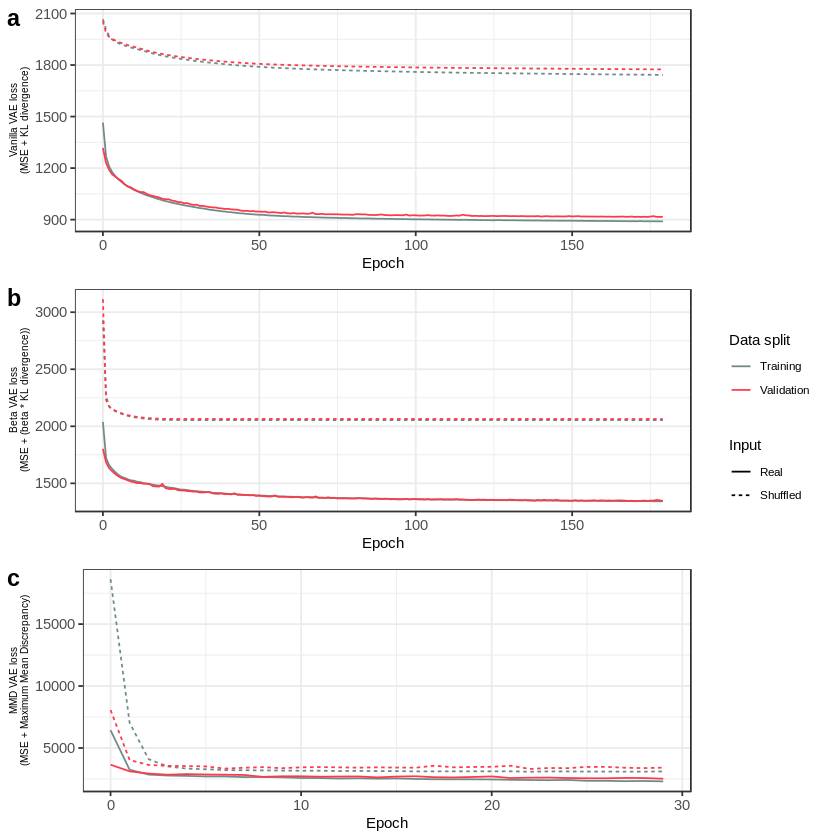

In [13]:
# Combine figure together
figure_2_gg <- (
    cowplot::plot_grid(
        cowplot::plot_grid(
            panel_a_gg + theme(legend.position = "none"),
            panel_b_gg + theme(legend.position = "none"),
            panel_c_gg + theme(legend.position = "none"),
            labels = c("a", "b", "c"),
            nrow = 3
        ),
        figure_2_legend,
        rel_widths = c(1, 0.2),
        ncol = 2
    )
)

figure_2_gg

In [14]:
# Save figure
output_file_base <- file.path("output", "figure2_training_curves_L1000")
for (file_extension in file_extensions) {
    output_file <- paste0(output_file_base, file_extension)
    
    cowplot::save_plot(output_file, figure_2_gg, dpi = 500, base_width = 6, base_height = 6)
}